In [1]:
import pandas as pd
import seaborn as sns

In [2]:
game_data = pd.read_csv("../data/game_stats.csv")
games = pd.read_csv("../data/games.csv")

In [3]:
combined_data = games.merge(game_data, left_on='id', right_on='id', validate='one_to_one')

In [4]:
def point_diff(row):
    return row["home_points"] - row["away_points"]

combined_data["point_differential"] = combined_data.apply(point_diff, axis=1)

Text(0.5, 1.0, 'Home Team Total Yards vs Point Differential')

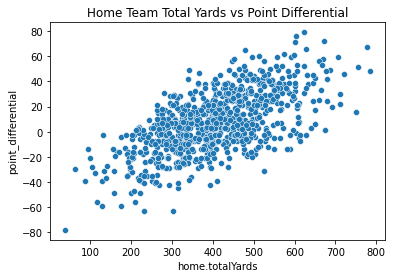

In [5]:
sns.scatterplot(
    data=combined_data, x="home.totalYards", y="point_differential"
).set_title("Home Team Total Yards vs Point Differential")

In [6]:
combined_data.head()

,Unnamed: 0_x,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,...,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints,point_differential
0,0,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,...,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0,38.0
1,1,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,...,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0,28.0
2,2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,...,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0,13.0
3,3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,...,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0,35.0
4,4,332430194,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,103980.0,...,6-62,1,0,1,27:22,44.0,0.0,4.0,2.0,20.0


In [8]:
combined_data["point_differential"].median()

7.0

Text(0.5, 1.0, 'Home Team Total Yards vs Point Differential')

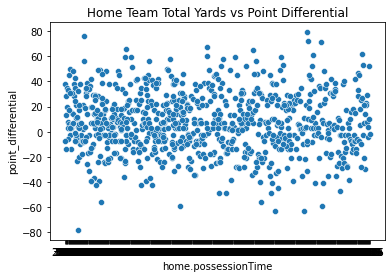

In [9]:
sns.scatterplot(
    data=combined_data, x="home.possessionTime", y="point_differential"
).set_title("Home Team Total Yards vs Point Differential")

<AxesSubplot:xlabel='home.possessionTime', ylabel='point_differential'>

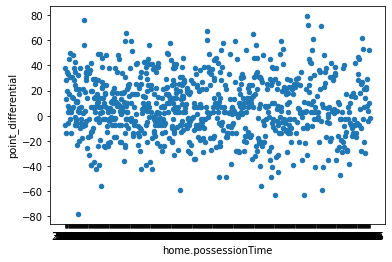

In [10]:
combined_data.plot.scatter(x="home.possessionTime", y="point_differential")

In [12]:
combined_data.columns

Index(['Unnamed: 0_x', 'id', 'season', 'week', 'season_type', 'start_date',
       'start_time_tbd', 'neutral_site', 'conference_game', 'attendance',
       ...
       'away.totalPenaltiesYards', 'away.turnovers', 'away.fumblesLost',
       'away.interceptions', 'away.possessionTime', 'home.puntReturnYards',
       'home.puntReturnTDs', 'home.puntReturns', 'away.kickingPoints',
       'point_differential'],
      dtype='object', length=101)

<AxesSubplot:xlabel='home.turnovers', ylabel='point_differential'>

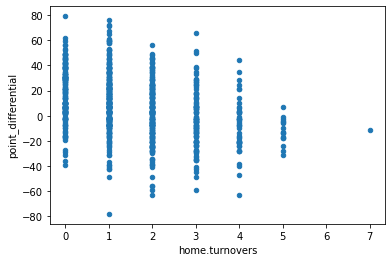

In [17]:
combined_data.plot.scatter(x="home.turnovers", y="point_differential")

I chose to look at possession time and turnovers to compare to the point differential of games. Surprisingly, the home team's possession time didn't impact the point differential much, but there seemed to be a correlation between increased turnovers and a negative point differential.